## Ejercicio 1
Escribir un algoritmo PSO para la maximización de la función:
$$
    y=sin(x)+sin(x^2)
$$
en el intervalo de $0 ≤ x ≤ 10$. Ejecutar el algoritmo en Python con los siguientes parámetros: 

Número de partículas = 2

Máximo número de iteraciones = 30

Coeficientes de aceleración c1 = c2 = 1.49

Peso de inercia w = 0.5


In [1]:
import numpy as np
from tests.optimizers.test_tolerance import iterations


# función objetivo a maximizar
def f(x):
    return np.sin(x) + np.sin(x**2)  # funcion objetivo: sin(x) + sin(x**2)

# restriccion
def g1(x):
    return 0 <= x <= 10  # restriccion: 0 <= x <= 10

# parametros
n_particles = 2  # numero de particulas en el enjambre
max_iterations = 30  # numero máximo de iteraciones para la optimizacion
c1 = c2 = 1.49  # coeficientes de aceleracion
w = 0.5  # Factor de inercia

# inicialización de particulas
x = np.zeros(n_particles)  # matriz para las posiciones de las particulas
v = np.zeros(n_particles)  # matriz para las velocidades de las particulas
pbest = np.zeros(n_particles)  # matriz para los mejores valores personales
pbest_fit = -np.inf * np.ones(n_particles)  # vector para las mejores aptitudes personales (inicialmente -infinito)
gbest = 0  # mejor solución global
gbest_fit = -np.inf  # mejor aptitud global (inicialmente -infinito)
gbest_history = [] #va guardando el gbest de cada iteracion

# inicializacion de particulas factibles
for i in range(n_particles):
    while True:  # bucle para asegurar que la particula sea factible
        x[i] = np.random.uniform(0, 10)  # inicializacion posicion aleatoria en el rango [0, 10]
        if g1(x[i]):  # se comprueba si la posicion cumple las restricciones
            break  # Salir del bucle si es factible
    v[i] = np.random.uniform(-1, 1)  # inicializar velocidad aleatoria
    pbest[i] = x[i].copy()  # ee establece el mejor valor personal inicial como la posicion actual
    fit = f(x[i])  # calculo la aptitud de la posicion inicial
    if fit > pbest_fit[i]:  # si la aptitud es mejor que la mejor conocida
        pbest_fit[i] = fit  # se actualiza el mejor valor personal

# Optimizacion
for J in range(max_iterations):  # Repetir hasta el número máximo de iteraciones
    for i in range(n_particles):
        fit = f(x[i])  # Se calcula la aptitud de la posicion actual
        # Se comprueba si la nueva aptitud es mejor y si cumple las restricciones
        if fit > pbest_fit[i] and g1(x[i]):
            pbest_fit[i] = fit  # Se actualiza la mejor aptitud personal
            pbest[i] = x[i].copy()  # Se actualizar la mejor posicion personal
            if fit > gbest_fit:  # Si la nueva aptitud es mejor que la mejor global
                gbest_fit = fit  # Se actualizar la mejor aptitud global
                gbest = x[i].copy()  # Se actualizar la mejor posicion global
        
        # actualizacion de la velocidad de la particula
        v[i] = w * v[i] + c1 * np.random.rand() * (pbest[i] - x[i]) + c2 * np.random.rand() * (gbest - x[i])
        x[i] += v[i]  # Se actualiza la posicion de la particula

        # se asegura de que la nueva posicion esté dentro de las restricciones
        if not (g1(x[i])):
            # Si la nueva posicion no es válida, revertir a la mejor posicion personal
            x[i] = pbest[i].copy()
    gbest_history.append(gbest) 

# Se imprime la mejor solucion encontrada y también su valor optimo
print(f"Mejor solucion: [{gbest:.4f}]")
print(f"Valor optimo: {gbest_fit}")

Mejor solucion: [1.2947]
Valor optimo: 1.9565720285231856


a. (Valor 0.1 puntos) Transcribir en el informe la solución óptima
encontrada (dominio) y el valor óptimo (imagen).

b. (Valor 0.1 puntos) Indicar la URL del repositorio en donde se encuentra
el algoritmo PSO.

c. (Valor 0.2 puntos) Graficar usando matplotlib la función objetivo y
agregar un punto celeste en donde el algoritmo haya encontrado el valor
máximo. El gráfico debe contener etiquetas en los ejes, leyenda y un
título.

d. (Valor 0.2 puntos) Realizar un gráfico de línea que muestre gbest en
función de las iteraciones realizadas.

e. (Valor 0.4 puntos) Realizar observaciones/comentarios/conclusiones
sobre los resultados obtenidos.

a. La solucion optima encontrada es 1.2945 y el valor optimo es 1.9566

b. 


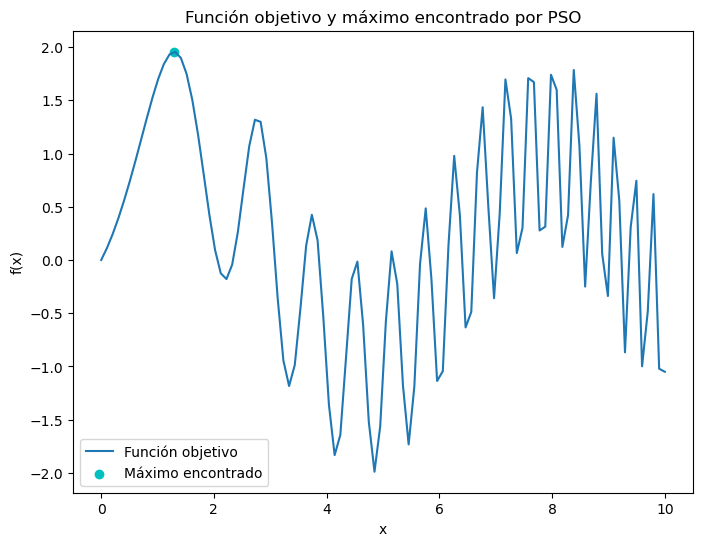

In [2]:
# c.
import matplotlib.pyplot as plt

x_values = np.linspace(0, 10, 100)
y_values = f(x_values)

plt.figure(figsize=(8, 6))
plt.plot(x_values, y_values, label='Función objetivo')
plt.scatter(gbest, gbest_fit, color='c', label='Máximo encontrado')

plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Función objetivo y máximo encontrado por PSO')
plt.legend()

plt.show()

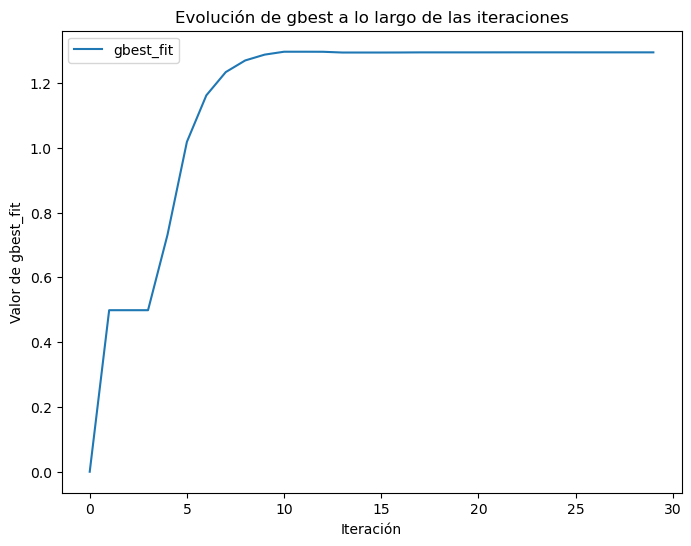

In [3]:
#d.
plt.figure(figsize=(8, 6))
plt.plot(range(max_iterations), gbest_history, label='gbest_fit')
plt.xlabel('Iteración')
plt.ylabel('Valor de gbest_fit')
plt.title('Evolución de gbest a lo largo de las iteraciones')
plt.legend()
plt.show()

e. Como se puede ver en el grafico del punto c, el maximo encontrado se aproxima al maximo absoluto de la funcion y. Luego, en el punto d, se puede ver como varia en un principio el valor gbest y luego de la iteracion 15 se estabiliza en el valor 1.29 y ya se queda en ese valor, lo que nos podria estar indicando que encontro el maximo.

## Ejercicio 2
Dada la siguiente función perteneciente a un paraboloide elíptico de la forma:
$$
f(x,y)=(x-a)^2+(y+b)^2
$$
donde, las constantes a y b son valores reales ingresados por el usuario a través de la consola, con intervalos de:
$$
-100<=x<=100, x \in \Re
$$
$$
-100<=y<=100, y \in \Re
$$
$$
-50<=a<=50, a \in \Re
$$
$$
-50<=b<=50, b \in \Re
$$

escribir en Python un algoritmo PSO para la minimización de la función (1) con
los siguientes parámetros: número de partículas = 20, máximo número de
iteraciones = 10, coeficientes de aceleración c1 = c2 = 2, peso de inercia w =
0.7, y que cumpla con las siguientes consignas:

In [17]:
# función objetivo a maximizar
def f(x, a, b):
    return (x[0]-a)**2+(x[1]-b)**2  # funcion objetivo: (x-a)^2+(y-b)^2


# primera restriccion
def g1(x):
    return -100 <= x[0] <= 100  # restriccion: -100 <= x <= 100


# segunda restriccion
def g2(x):
    return -100 <= x[1] <= 100  # restriccion: -100 <= y <= 100


# parametros
n_particles = 20  # numero de particulas en el enjambre
n_dimensions = 2  # dimensiones del espacio de busqueda (x1 y x2)
max_iterations = 10  # numero máximo de iteraciones para la optimizacion
c1 = c2 = 2  # coeficientes de aceleracion
w = 0.7  # Factor de inercia
a = 20  #constante en la funcion, esto se puede hacer para que lo agergue el usuario por consola
b = 30  #constante en la funcion, esto se puede hacer para que lo agergue el usuario por consola

# inicialización de particulas
x = np.zeros((n_particles, n_dimensions))  # matriz para las posiciones de las particulas
v = np.zeros((n_particles, n_dimensions))  # matriz para las velocidades de las particulas
pbest = np.zeros((n_particles, n_dimensions))  # matriz para los mejores valores personales
pbest_fit = np.inf * np.ones(n_particles)  # vector para las mejores aptitudes personales (inicialmente infinito)
gbest = np.zeros(n_dimensions)  # mejor solución global
gbest_fit = np.inf  # mejor aptitud global (inicialmente infinito)
gbest_history = np.zeros((n_dimensions,max_iterations)) #va guardando el gbest de cada iteracion

# inicializacion de particulas factibles
for i in range(n_particles):
    while True:  # bucle para asegurar que la particula sea factible
        x[i] = np.random.uniform(0, 10, n_dimensions)  # inicializacion posicion aleatoria en el rango [0, 10]
        if g1(x[i]) and g2(x[i]):  # se comprueba si la posicion cumple las restricciones
            break  # Salir del bucle si es factible
    v[i] = np.random.uniform(-1, 1, n_dimensions)  # inicializar velocidad aleatoria
    pbest[i] = x[i].copy()  # ee establece el mejor valor personal inicial como la posicion actual
    fit = f(x[i], a, b)  # calculo la aptitud de la posicion inicial
    if fit < pbest_fit[i]:  # si la aptitud es mejor que la mejor conocida
        pbest_fit[i] = fit  # se actualiza el mejor valor personal

# Optimizacion
for k in range(max_iterations):  # Repetir hasta el número máximo de iteraciones
    for i in range(n_particles):
        fit = f(x[i], a, b)  # Se calcula la aptitud de la posicion actual
        # Se comprueba si la nueva aptitud es mejor y si cumple las restricciones
        if fit < pbest_fit[i] and g1(x[i]) and g2(x[i]):
            pbest_fit[i] = fit  # Se actualiza la mejor aptitud personal
            pbest[i] = x[i].copy()  # Se actualizar la mejor posicion personal
            if fit < gbest_fit:  # Si la nueva aptitud es mejor que la mejor global
                gbest_fit = fit  # Se actualizar la mejor aptitud global
                gbest = x[i].copy()  # Se actualizar la mejor posicion global

        # actualizacion de la velocidad de la particula
        v[i] = w * v[i] + c1 * np.random.rand() * (pbest[i] - x[i]) + c2 * np.random.rand() * (gbest - x[i])
        x[i] += v[i]  # Se actualiza la posicion de la particula

        # se asegura de que la nueva posicion esté dentro de las restricciones
        if not (g1(x[i]) and g2(x[i])):
            # Si la nueva posicion no es válida, revertir a la mejor posicion personal
            x[i] = pbest[i].copy()
    for j in range(n_dimensions):
        gbest_history[j][k] = gbest[j] 

# Se imprime la mejor solucion encontrada y también su valor optimo
print(f"Mejor solucion: [{gbest[0]:.4f}, {gbest[1]:.4f}]")
print(f"Valor optimo: {gbest_fit}")


Mejor solucion: [20.1596, 29.9523]
Valor optimo: 0.027747504798011455


a. Transcribir en el informe la solución óptima
encontrada (dominio) y el valor óptimo (imagen).

b. Indicar la URL del repositorio en donde se encuentra
el algoritmo PSO.

c. Graficar usando matplotlib la función objetivo f(x, y)
en 3D y agregar un punto rojo en donde el algoritmo haya encontrado el
valor mínimo. El gráfico debe contener etiquetas en los ejes, leyenda y
un título.

d. Realizar un gráfico de línea que muestre gbest en
función de las iteraciones realizadas.

e. Establecer el coeficiente de inercia w en 0, ejecutar el
algoritmo y realizar observaciones/comentarios/conclusiones sobre los
resultados observados.

f. Reescribir el algoritmo PSO para que cumpla
nuevamente con los ítems A hasta F pero usando la biblioteca pyswarm
(from pyswarm import pso).

g. Realizar observaciones/comentarios/conclusiones
comparando los resultados obtenidos sin pyswarm y con pyswarm.

a. La solucion encontrada es 

$$
x=20.2066
$$
$$
y=29.7466
$$
$$
f=0.10688
$$
b. URL al algoritmo

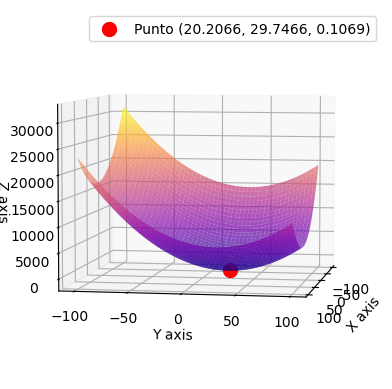

In [74]:
#c. 
import numpy as np
import matplotlib.pyplot as plt

# Generar datos de x y y en el rango de -100 a 100
x = np.linspace(-100, 100, 400)
y = np.linspace(-100, 100, 400)
x, y = np.meshgrid(x, y)

# Definir la función f(x, y) = (x - a)^2 + (y - b)^2
z = (x - a)**2 + (y - b)**2

# Crear el gráfico 3D
fig = plt.figure()

ax = fig.add_subplot(111, projection='3d')
# Cambiar el ángulo de visión
ax.view_init(elev=5, azim=10)
# Crear la superficie
ax.plot_surface(x, y, z, cmap='plasma', alpha=0.7)

# Definir un punto
punto_x = gbest[0]
punto_y = gbest[1]
punto_z = gbest_fit

# Graficar el punto
ax.scatter(punto_x, punto_y, punto_z, color='red', s=100, label=f'Punto ({punto_x:.4f}, {punto_y:.4f}, {punto_z:.4f})')

# Etiquetas de los ejes
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')

# Mostrar la leyenda y el gráfico
ax.legend()
plt.show()

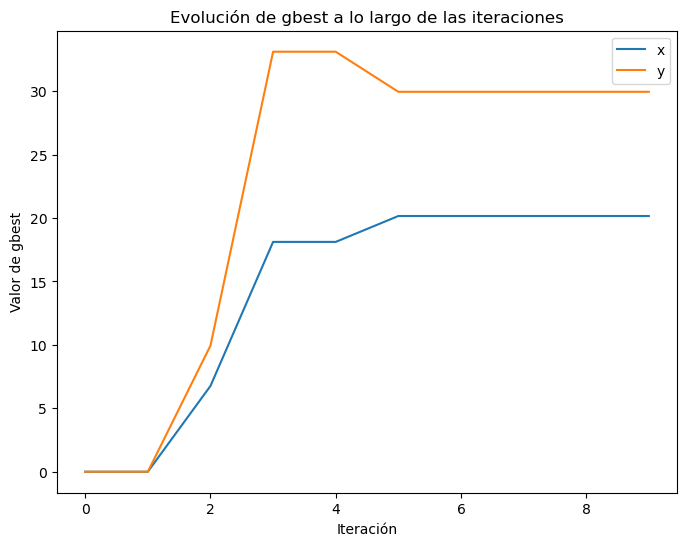

In [20]:
#d.
plt.figure(figsize=(8, 6))
plt.plot(range(max_iterations), gbest_history[0], label='x')
plt.plot(range(max_iterations), gbest_history[1], label='y')
plt.xlabel('Iteración')
plt.ylabel('Valor de gbest')
plt.title('Evolución de gbest a lo largo de las iteraciones')
plt.legend()
plt.show()